In [1]:
import pandas as pd
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

In [2]:
!pip install xgboost lightgbm

In [4]:
file_path = '/content/the_real_final_df.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
df[:2]

,gameid,participantid,champion,result,year,playerid,side,total_games,total_wins,total_kills,total_deaths,total_assists,team_kills,team_deaths,total_gold,total_damage,total_wards_placed,total_wards_killed,total_creep_score,total_game_minutes,total_first_bloods,total_losses,kda_ratio,kd_ratio,kill_participation,death_percent,kill_share,creep_score,creeps_per_minute,gold_percent,damage_per_minute,first_blood,wards_per_minute,wards_cleared_per_minute,Games,Win rate,K:D,GPM,GDM,Game duration,Kills / game,Deaths / game,Towers killed,Towers lost,FB%,FT%,DRAPG,DRA%,HERPG,HER%,DRA@15,TD@15,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM,pick2,pick3,pick4,pick5,opp_pick1,opp_pick2,opp_pick3,opp_pick4,opp_pick5,result_stats,kills,deaths,assists,teamkills,teamdeaths,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,goldat15,xpat15,csat15,PlayerPick_Aatrox,PlayerPick_Ahri,PlayerPick_Akali,PlayerPick_Akshan,PlayerPick_Alistar,PlayerPick_Amumu,PlayerPick_Anivia,PlayerPick_Annie,PlayerPick_Aphelios,PlayerPick_Ashe,PlayerPick_Aurelion Sol,PlayerPick_Azir,PlayerPick_Bard,PlayerPick_Bel'Veth,PlayerPick_Blitzcrank,PlayerPick_Brand,PlayerPick_Braum,PlayerPick_Briar,PlayerPick_Caitlyn,PlayerPick_Camille,PlayerPick_Cassiopeia,PlayerPick_Cho'Gath,PlayerPick_Corki,PlayerPick_Darius,PlayerPick_Diana,PlayerPick_Dr. Mundo,PlayerPick_Draven,PlayerPick_Ekko,PlayerPick_Elise,PlayerPick_Evelynn,PlayerPick_Ezreal,PlayerPick_Fiddlesticks,PlayerPick_Fiora,PlayerPick_Fizz,PlayerPick_Galio,PlayerPick_Gangplank,PlayerPick_Garen,PlayerPick_Gnar,PlayerPick_Gragas,PlayerPick_Graves,PlayerPick_Gwen,PlayerPick_Hecarim,PlayerPick_Heimerdinger,PlayerPick_Illaoi,PlayerPick_Irelia,PlayerPick_Ivern,PlayerPick_Janna,PlayerPick_Jarvan IV,PlayerPick_Jax,PlayerPick_Jayce,PlayerPick_Jhin,PlayerPick_Jinx,PlayerPick_K'Sante,PlayerPick_Kai'Sa,PlayerPick_Kalista,PlayerPick_Karma,PlayerPick_Karthus,PlayerPick_Kassadin,PlayerPick_Katarina,PlayerPick_Kayle,PlayerPick_Kayn,PlayerPick_Kennen,PlayerPick_Kha'Zix,PlayerPick_Kindred,PlayerPick_Kled,PlayerPick_Kog'Maw,PlayerPick_LeBlanc,PlayerPick_Lee Sin,PlayerPick_Leona,PlayerPick_Lillia,PlayerPick_Lissandra,PlayerPick_Lucian,PlayerPick_Lulu,PlayerPick_Lux,PlayerPick_Malphite,PlayerPick_Malzahar,PlayerPick_Maokai,PlayerPick_Master Yi,PlayerPick_Milio,PlayerPick_Miss Fortune,PlayerPick_Mordekaiser,PlayerPick_Morgana,PlayerPick_Naafiri,PlayerPick_Nami,PlayerPick_Nasus,PlayerPick_Nautilus,PlayerPick_Neeko,PlayerPick_Nidalee,PlayerPick_Nilah,PlayerPick_Nocturne,PlayerPick_Nunu & Willump,PlayerPick_Olaf,PlayerPick_Orianna,PlayerPick_Ornn,PlayerPick_Pantheon,PlayerPick_Poppy,PlayerPick_Pyke,PlayerPick_Qiyana,PlayerPick_Quinn,PlayerPick_Rakan,PlayerPick_Rammus,PlayerPick_Rek'Sai,PlayerPick_Rell,PlayerPick_Renata Glasc,PlayerPick_Renekton,PlayerPick_Rengar,PlayerPick_Riven,PlayerPick_Rumble,PlayerPick_Ryze,PlayerPick_Samira,PlayerPick_Sejuani,PlayerPick_Senna,PlayerPick_Seraphine,PlayerPick_Sett,PlayerPick_Shaco,PlayerPick_Shen,PlayerPick_Shyvana,PlayerPick_Singed,PlayerPick_Sion,PlayerPick_Sivir,PlayerPick_Skarner,PlayerPick_Sona,PlayerPick_Soraka,PlayerPick_Swain,PlayerPick_Sylas,PlayerPick_Syndra,PlayerPick_Tahm Kench,PlayerPick_Taliyah,PlayerPick_Talon,PlayerPick_Taric,PlayerPick_Teemo,PlayerPick_Thresh,PlayerPick_Tristana,PlayerPick_Trundle,PlayerPick_Tryndamere,PlayerPick_Twisted Fate,PlayerPick_Twitch,PlayerPick_Udyr,PlayerPick_Urgot,PlayerPick_Varus,PlayerPick_Vayne,PlayerPick_Veigar,PlayerPick_Vel'Koz,PlayerPick_Vex,PlayerPick_Vi,PlayerPick_Viego,PlayerPick_Viktor,PlayerPick_Vladimir,PlayerPick_Volibear,PlayerPick_Warwick,PlayerPick_Wukong,PlayerPick_Xayah,PlayerPick_Xerath,PlayerPick_Xin Zhao,PlayerPick_Yasuo,PlayerPick_Yone,PlayerPick_Yorick,PlayerPick

In [5]:
# Drop rows with any NaN values
df.dropna(inplace=True)

In [6]:
# Selecting features and the target variable
X = df.drop('result', axis=1)
y = df['result']

# Convert categorical data if necessary
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

In [10]:
# Predict with XGBoost
xgb_predictions = xgb_model.predict(dtest)
xgb_auc = roc_auc_score(y_test, xgb_predictions)
print(f"XGBoost AUC: {xgb_auc:.4f}")

XGBoost AUC: 0.6477


In [20]:
import numpy as np

# Assuming xgb_predictions is an array of scores or probabilities
# Convert predictions: > 50 becomes 1, <= 50 becomes 0
binary_predictions = np.where(xgb_predictions > 0.5, 1, 0)

# Display the new binary predictions
print(binary_predictions)

[0 0 1 ... 0 1 1]


In [21]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.6003
Recall: 0.6459


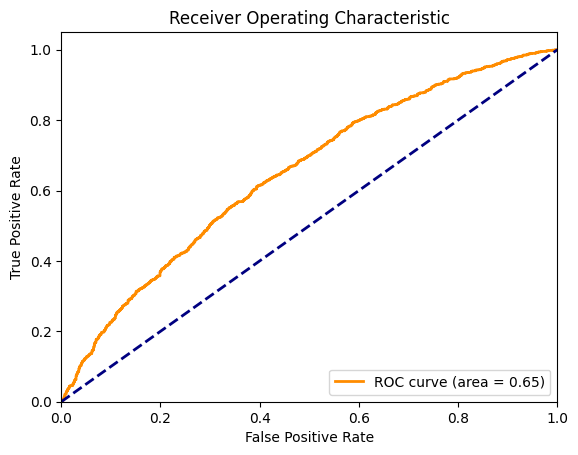

ROC AUC: 0.6477


In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, xgb_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC: {roc_auc:.4f}")


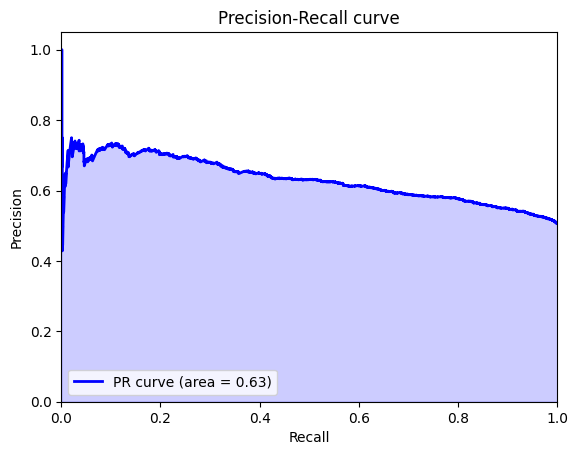

PR AUC: 0.6306


In [26]:
from sklearn.metrics import precision_recall_curve, auc
precision_pr, recall_pr, _ = precision_recall_curve(y_test, xgb_predictions)
auc_pr = auc(recall_pr, precision_pr)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall_pr, precision_pr, color='blue', lw=2, label='PR curve (area = %0.2f)' % auc_pr)
plt.fill_between(recall_pr, precision_pr, alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

print(f"PR AUC: {auc_pr:.4f}")
